# Import Python libraries and directory of results

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import statsmodels.api as sm
import scikit_posthocs as sp
from statsmodels.formula.api import ols
from statannotations.Annotator import Annotator
#from ITS_lib.ITS_functions import ITS_plot, ITS_subplots

In [6]:
#from google.colab import drive
#drive.mount("/content/drive")

#!pip install pingouin

#!pip install statannotations
#!pip install statsmodels
#!pip install scikit_posthocs

In [7]:
from pathlib import Path

#DATA = Path("/content/drive/My Drive/BBL/GP_ITS")
DATA = Path("C:/Users/Teo/Downloads")

# Create one table with ITS results

In [8]:
ITS = pd.read_csv(DATA / 'result_gp_cart_indent.txt', sep = '\t', header = None)
ITS.columns = ['Filename','number', '','counts','E', 'ksi_name', 'ksi','k_name','k','v_name','v','r2name','R2']
ITS['ID'] = ITS['Filename'].astype(str).str.split('_').str[0]
ITS['Location'] = ITS['Filename'].astype(str).str.split('_').str[1]
ITS['Subregion'] = ITS['Filename'].astype(str).str.split('_').str[2]
ITS['Location_Subregion'] = ITS['Location'] + '_' + ITS['Subregion']
ITS.head()

,Filename,number,,counts,E,ksi_name,ksi,k_name,k,v_name,v,r2name,R2,ID,Location,Subregion,Location_Subregion
0,GP11_LT_MED_load1,NaN,NaN,80,0.54023,ksi:,0.49649,k:,0.010601,v:,0.29384,R^2:,0.74939,GP11,LT,MED,LT_MED
1,GP10_LT_MED_load2,NaN,NaN,80,0.92637,ksi:,0.48846,k:,0.003693,v:,0.30000,R^2:,0.73873,GP10,LT,MED,LT_MED
2,GP10_LT_MED_load3,NaN,NaN,80,1.00100,ksi:,0.44014,k:,0.002354,v:,0.29151,R^2:,0.90715,GP10,LT,MED,LT_MED
3,GP5_LT_MED_load1,NaN,NaN,80,0.51349,ksi:,0.60804,k:,0.003899,v:,0.30000,R^2:,0.89013,GP5,LT,MED,LT_MED
4,GP5_LT_LAT_load3,NaN,NaN,80,0.75942,ksi:,0.44137,k:,0.009012,v:,0.30000,R^2:,0.50862,GP5,LT,LAT,LT_LAT


In [11]:
GP_ID = pd.read_csv(DATA /'GP_fileID_histo.txt', header = None, sep = '\t')
GP_ID.columns = ['GP','Month']
GP_ID.head()

,GP,Month
0,GP5,2
1,GP6,2
2,GP7,2
3,GP8,3
4,GP9,4


In [12]:
ITS_merge = pd.merge(ITS, GP_ID, left_on = 'ID', right_on = 'GP')
ITS_merge.head()

,Filename,number,,counts,E,ksi_name,ksi,k_name,k,v_name,v,r2name,R2,ID,Location,Subregion,Location_Subregion,GP,Month
0,GP11_LT_MED_load1,NaN,NaN,80,0.54023,ksi:,0.49649,k:,0.010601,v:,0.29384,R^2:,0.74939,GP11,LT,MED,LT_MED,GP11,5
1,GP10_LT_MED_load2,NaN,NaN,80,0.92637,ksi:,0.48846,k:,0.003693,v:,0.30000,R^2:,0.73873,GP10,LT,MED,LT_MED,GP10,5
2,GP10_LT_MED_load3,NaN,NaN,80,1.00100,ksi:,0.44014,k:,0.002354,v:,0.29151,R^2:,0.90715,GP10,LT,MED,LT_MED,GP10,5
3,GP10_LT_LAT_load3,NaN,NaN,80,1.34820,ksi:,0.17053,k:,0.000412,v:,0.30000,R^2:,0.98377,GP10,LT,LAT,LT_LAT,GP10,5
4,GP10_LT_MED_load1,NaN,NaN,80,0.38691,ksi:,0.17236,k:,1.180100,v:,0.30000,R^2:,0.49485,GP10,LT,MED,LT_MED,GP10,5


In [13]:
ITS_merge.groupby(['Location_Subregion', 'Month']).mean()

number             E       ksi         k         v  \
Location_Subregion Month                                                       
LF_LAT             2       5.500 NaN  3.338700  5.111400  0.000524  0.300000   
LT_LAD             2      60.000 NaN  0.453330  3.018500  0.039010  0.300000   
LT_LAT             2         NaN NaN  0.759420  0.441370  0.009012  0.300000   
                   3      43.500 NaN  9.713350  2.454115  0.000089  0.300000   
                   4      24.125 NaN  1.979205  2.126577  0.007927  0.301231   
                   5       1.000 NaN  2.209750  0.295840  0.000247  0.300000   
LT_MED             2         NaN NaN  0.513490  0.608040  0.003899  0.300000   
                   3      26.000 NaN  1.635103  0.265754  0.009306  0.300000   
                   4      28.500 NaN  3.838118  2.754378  0.000757  0.307222   
                   5      29.000 NaN  0.713627  0.399363  0.299187  0.296337   

                                R2  
Location_Subregion Month            
LF_LAT             2      0.688650  
LT_LAD             2      0.605550  
LT_LAT             2      0.508620  
                   3      0.332220  
                   4     -5.448738  
                   5      0.980620  
LT_MED             2      0.890130  
                   3      0.498165  
                   4      0.753273  
                   5      0.722530

In [14]:
ITS_merge.groupby(['Location_Subregion', 'Month']).std()

number             E       ksi         k  \
Location_Subregion Month                                                
LF_LAT             2       0.707107 NaN       NaN       NaN       NaN   
LT_LAD             2            NaN NaN       NaN       NaN       NaN   
LT_LAT             2            NaN NaN       NaN       NaN       NaN   
                   3       3.535534 NaN  5.914312  3.235417  0.000029   
                   4      19.126926 NaN  1.078914  2.009699  0.015861   
                   5            NaN NaN  1.218416  0.177215  0.000233   
LT_MED             2            NaN NaN       NaN       NaN       NaN   
                   3      15.083103 NaN  1.221958  0.167569  0.012528   
                   4      22.607521 NaN  4.450300  1.941332  0.000899   
                   5            NaN NaN  0.297015  0.153368  0.587286   

                                 v         R2  
Location_Subregion Month                       
LF_LAT             2           NaN        NaN  
LT_LAD             2           NaN        NaN  
LT_LAT             2           NaN        NaN  
                   3      0.000000   0.179421  
                   4      0.003483  16.308248  
                   5      0.000000   0.004455  
LT_MED             2           NaN        NaN  
                   3      0.000000   0.394525  
                   4      0.017689   0.167669  
                   5      0.004335   0.170202

### Add code to save merged dataframe and can start with that

## Filter by individual GP

In [ ]:
def label_cohort (row):
   if row['GP'] == 'GP_10':
      return 5
   if row['GP'] == 'GP_11':
      return 5
   if row['GP'] == 'GP_12':
      return 5
   if row['GP'] == 'GP_13':
      return 4
   if row['GP'] == 'GP_14':
      return 4
   if row['GP'] == 'GP_15':
      return 4
   if row['GP'] == 'GP_8':
      return 3
   if row['GP'] == 'GP_9':
      return 3
   if row['GP'] == 'GP_16':
      return 3
   if row['GP'] == 'GP_17':
      return 3
   return 0

In [ ]:
ITS_merge['Cohort'] = ITS_merge.apply(lambda row: label_cohort(row), axis=1)

In [ ]:
ITS_merge['GP_Location_Subregion'] = ITS_merge['GP'] + '_' + ITS_merge['Location_Subregion']

In [ ]:
ITS_erode_RT_MED = ITS_merge[(ITS_merge.Location_Subregion == "RT_MED")]

In [ ]:
ITS_erode_RT_MED.groupby(['GP', 'Month']).mean()

In [ ]:
ITS_erode_RT_MED.groupby(['Cohort', 'Month']).mean()

In [ ]:
import scipy.stats as stats

stats.f_oneway(ITS_erode_RT_MED['Thickness'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['Thickness'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['Thickness'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['Porosity'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['Porosity'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['Porosity'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['TMD'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['TMD'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['TMD'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['BMD'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['BMD'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['BMD'][ITS_erode_RT_MED['Cohort'] == 5])

# Cartilage thickness

In [ ]:
GP_measurements = pd.read_csv(DATA /'gp_measurements.txt', header = None, sep = '\t')
GP_measurements.columns = ['GP','Sample','ID']

In [ ]:
GP_cartilage_thickness= pd.read_csv(DATA /'gp_cartilage_thickness.txt', header = None, sep = '\t')
GP_cartilage_thickness.columns = ['Sample','Cart_LAT_thickness','Cart_MED_thickness']

In [ ]:
GP_merge = pd.merge(GP_cartilage_thickness, GP_measurements, left_on = 'Sample', right_on = 'Sample')
GP_merge.head()

In [ ]:
ITS_erode_merge = pd.merge(ITS_erode_merge, GP_merge, left_on = 'ID', right_on = 'ID')
ITS_erode_merge.head()

In [ ]:
ITS_erode_merge.to_csv(DATA /'GP_right.txt', sep = '\t')

In [ ]:
ax = sns.barplot(data = ITS_erode_merge, x='Location_Subregion', y='Cart_LAT_thickness', hue='Month', estimator=np.mean, ci = 68, capsize=.2)
ax.legend_.remove()
pairs=[('RF_LAT', 'RF_MED'), ('RF_LAT', 'RT_LAT'), ('RF_LAT', 'RT_MED'),('RF_MED',  'RT_LAT'), ('RF_MED', 'RT_MED'), ('RT_LAT', 'RT_MED')]

annotator = Annotator(ax, pairs, data=ITS_erode_merge, x='Location_Subregion', y='Cart_LAT_thickness')
annotator.configure(test='t-test_paired', text_format='star', loc='outside')
#annotator.apply_and_annotate()

# Statistical Analysis

In [ ]:
print(pg.normality(ITS_erode_merge))

## Longitudinal Analyses

In [ ]:
ITS_erode_merge.rm_anova(dv='PR_ratio',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', detailed = False)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='PR_ratio',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', padjust='sidak', data = ITS_erode_merge)
post_hocs

In [ ]:
ITS_erode_merge.rm_anova(dv='rTb_N',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', detailed = False)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='rTb_N',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', padjust='BH', data = ITS_erode_merge)
post_hocs

In [ ]:
ITS_erode_merge.rm_anova(dv='pTb_Th',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', detailed = False)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='pTb_Th',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', padjust='bonferroni', data = ITS_erode_merge)
post_hocs

## Cross-sectional Analyses

In [ ]:
PR_model = ols('PR_ratio ~ C(Location_Subregion) + C(Month) + C(Location_Subregion):C(Month)', data=ITS_erode_merge).fit()

sm.stats.anova_lm(PR_model,typ=2)

In [ ]:
sp.posthoc_ttest(ITS_erode_merge, val_col='PR_Ratio', group_col='Month', p_adjust='holm')

# Plot ITS results - line graphs


In [ ]:
plt.style.use('seaborn-bright')
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 20}) 
import numpy as np

In [ ]:
ITS_erode_RT_MED["Month"] = ITS_erode_RT_MED["Month"].astype(str)

#hue_order = list(['3', '4', '5'])
#order = ["RF_LAT", "RF_MED", "RT_LAT","RT_MED"]
#order = ["LF_LAT", "LF_MED", "LT_LAT","LT_MED","RF_LAT", "RF_MED", "RT_LAT","RT_MED"]


hue_plot_params = {
    'data': ITS_erode_RT_MED,
    'x': 'Month',
  #  "order": order,
    "hue": "GP_Location_Subregion",
    #"hue_order": "RT_MED"
    #"hue_order": order
}

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='PR_ratio')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='BV_TV')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='pBV_TV')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='rBV_TV')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='rTb_N')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='rTb_Th')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='pTb_Th')

# Plot ITS results bar graphs


In [15]:
plt.style.use('seaborn-muted')
#plt.style.use('dark_background')
#plt.style.use('seaborn-bright')
#plt.style.use('grayscale')
#colors=['darkgray','gray','dimgray','lightgray']
#plt.style.use('seaborn-Greys')

In [16]:
#plt.rcParams["figure.figsize"] = (5.5, 4)
#plt.rcParams["figure.figsize"] = (16.5,6.2)
plt.rcParams["figure.figsize"] = (16.5,16.5)
#plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams.update({'font.size': 20}) # 'font.weight' : 'bold', 'axes.labelweight': 'bold'})

In [17]:
import numpy as np

In [27]:
ITS_merge["Month"] = ITS_merge["Month"].astype(str)
#ITS_merge_5months["Month"] = ITS_merge_5months["Month"].astype(str)

hue_order = list(['2', '3', '4', '5'])
order = ["LF_LAT", "LF_MED", "LT_LAT","LT_MED"]
#order = ["LF_LAT", "LF_MED", "LT_LAT","LT_MED","RF_LAT", "RF_MED", "RT_LAT","RT_MED"]


hue_plot_params = {
    'data': ITS_merge,
    'x': 'Location_Subregion',
    "order": order,
    "hue": "Month",
    "hue_order": hue_order
}

In [19]:
import seaborn as sns

def ITS_plot(ITS_param):
    sns.set_context(rc = {'patch.linewidth': 1.0})
    ax = sns.barplot(**hue_plot_params, y=ITS_param, estimator=np.mean, ci=68, capsize=.2, errcolor='black') 
    #,fill=False)
    ax = sns.stripplot(**hue_plot_params, y=ITS_param, color='black', dodge=True)
    
    #ax = sns.barplot(**hue_plot_params, y=ITS_param, estimator=np.mean, ci=68, capsize=.2, errcolor='black') #,fill=False)
    #ax = sns.swarmplot(**hue_plot_params, y=ITS_param, color='black', dodge=True)
    
    ax.set(xlabel = 'Location')
    ax.set(ylabel = '')
    ax.set(title = ITS_param)

    ax.legend_.remove()
    #ax.legend(loc='upper center',ncol=4)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    annotator = Annotator(ax, pairs, **hue_plot_params, y=ITS_param,show_non_significant=False)
    annotator.configure(test='t-test_ind', comparisons_correction='BH', correction_format="replace", text_format='star', color='black', loc='inside',pvalue_thresholds=[[1e-4, "*"], [1e-3, "*"], [1e-2, "*"], [0.05, "*"],[1, ""]])
    annotator.apply_and_annotate()
 
    img_name = str(DATA) + "/ITS_" + ITS_param + ".png"
    plt.tight_layout()

    plt.savefig(img_name, bbox_inches = "tight")


In [28]:
def ITS_subplots(ITS_param1, ITS_param2, ITS_param3):
    plt.subplot(1,3,1)
    ITS_plot(ITS_param1)
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1,3,2)
    ITS_plot(ITS_param2)
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1,3,3)
    ITS_plot(ITS_param3)
    plt.xticks(rotation=45, ha='right')
    
    img_name = str(DATA) + "/cartilage_subplots.png"
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.savefig(img_name) #, bbox_inches = "tight")	

In [21]:
ITS_merge.to_csv(DATA/'SBP_merge.csv',index=False)

In [22]:
pairs=[[('RF_LAT','2'), ('RF_LAT','3')], [('RF_LAT','2'), ('RF_LAT','4')], [('RF_LAT','2'), ('RF_LAT','5')],[('RF_LAT','3'), ('RF_LAT','4')],[('RF_LAT','3'), ('RF_LAT','5')],[('RF_LAT','4'), ('RF_LAT','5')],
       [('RF_MED','2'), ('RF_MED','3')], [('RF_MED','2'), ('RF_MED','4')], [('RF_MED','2'), ('RF_MED','5')],[('RF_MED','3'), ('RF_MED','4')],[('RF_MED','3'), ('RF_MED','5')],[('RF_MED','4'), ('RF_MED','5')],
       [('RT_LAT','2'), ('RT_LAT','3')], [('RT_LAT','2'), ('RT_LAT','4')], [('RT_LAT','2'), ('RT_LAT','5')],[('RT_LAT','3'), ('RT_LAT','4')],[('RT_LAT','3'), ('RT_LAT','5')],[('RT_LAT','4'), ('RT_LAT','5')],
       [('RT_MED','2'), ('RT_MED','3')], [('RT_MED','2'), ('RT_MED','4')], [('RT_MED','2'), ('RT_MED','5')],[('RT_MED','3'), ('RT_MED','4')],[('RT_MED','3'), ('RT_MED','5')],[('RT_MED','4'), ('RT_MED','5')]]

In [ ]:
pairs=[[('RF_LAT','2'), ('RF_LAT','3')], [('RF_LAT','2'), ('RF_LAT','4')], [('RF_LAT','2'), ('RF_LAT','5')],[('RF_LAT','3'), ('RF_LAT','4')],[('RF_LAT','3'), ('RF_LAT','5')],[('RF_LAT','4'), ('RF_LAT','5')],
       [('RF_MED','2'), ('RF_MED','3')], [('RF_MED','2'), ('RF_MED','4')], [('RF_MED','2'), ('RF_MED','5')],[('RF_MED','3'), ('RF_MED','4')],[('RF_MED','3'), ('RF_MED','5')],[('RF_MED','4'), ('RF_MED','5')],
       [('RT_LAT','2'), ('RT_LAT','3')], [('RT_LAT','2'), ('RT_LAT','4')], [('RT_LAT','2'), ('RT_LAT','5')],[('RT_LAT','3'), ('RT_LAT','4')],[('RT_LAT','3'), ('RT_LAT','5')],[('RT_LAT','4'), ('RT_LAT','5')],
       [('RT_MED','2'), ('RT_MED','3')], [('RT_MED','2'), ('RT_MED','4')], [('RT_MED','2'), ('RT_MED','5')],[('RT_MED','3'), ('RT_MED','4')],[('RT_MED','3'), ('RT_MED','5')],[('RT_MED','4'), ('RT_MED','5')],
       [('LF_LAT','2'), ('LF_LAT','3')], [('LF_LAT','2'), ('LF_LAT','4')], [('LF_LAT','2'), ('LF_LAT','5')],[('LF_LAT','3'), ('LF_LAT','4')],[('LF_LAT','3'), ('LF_LAT','5')],[('LF_LAT','4'), ('LF_LAT','5')],
       [('LF_MED','2'), ('LF_MED','3')], [('LF_MED','2'), ('LF_MED','4')], [('LF_MED','2'), ('LF_MED','5')],[('LF_MED','3'), ('LF_MED','4')],[('LF_MED','3'), ('LF_MED','5')],[('LF_MED','4'), ('LF_MED','5')],
       [('LT_LAT','2'), ('LT_LAT','3')], [('LT_LAT','2'), ('LT_LAT','4')], [('LT_LAT','2'), ('LT_LAT','5')],[('LT_LAT','3'), ('LT_LAT','4')],[('LT_LAT','3'), ('LT_LAT','5')],[('LT_LAT','4'), ('LT_LAT','5')],
       [('LT_MED','2'), ('LT_MED','3')], [('LT_MED','2'), ('LT_MED','4')], [('LT_MED','2'), ('LT_MED','5')],[('LT_MED','3'), ('LT_MED','4')],[('LT_MED','3'), ('LT_MED','5')],[('LT_MED','4'), ('LT_MED','5')]]

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


ValueError: Missing x value(s) `"LF_MED"` in Location_Subregion (specified in `order`)

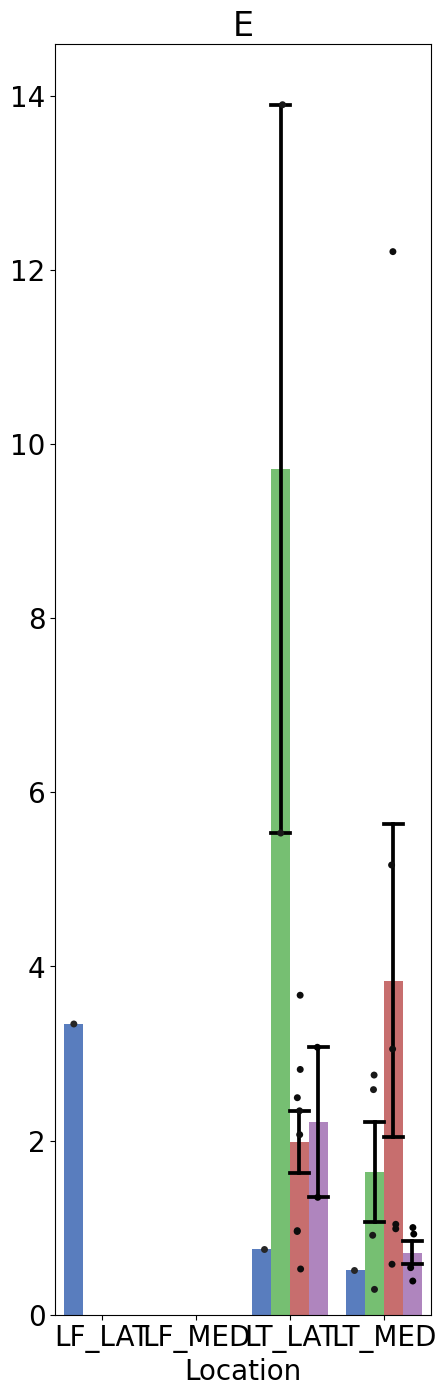

In [29]:
ITS_subplots('E','ksi','k')